##Import

##Import

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import ExtraTreesClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import VotingClassifier

import folium
from folium.plugins import HeatMap
import plotly.express as px

plt.style.use('fivethirtyeight')
%matplotlib inline
pd.set_option('display.max_columns', 32)

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install catboost
from catboost import CatBoostClassifier

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 MB 8.4 MB/s eta 0:00:00


##Data Understanding

###Data Exploration

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/my work in collage/Skripsi/Data Penjualan LarisStore Utama.csv", sep=";", encoding='latin1')
df.head()

,Cancelation,SKU Unit Original Price,SKU Subtotal Before Discount,SKU Platform Discount,SKU Seller Discount,SKU Subtotal After Discount,Shipping Fee After Discount,Original Shipping Fee,Shipping Fee Platform Discount,Order Amount,Order Refund Amount,Shipping Fee Seller Discount,Taxes,Order ID,Order Status,Order Substatus,...,Warehouse Name,Tracking ID,Delivery Option,Shipping Provider Name,Buyer Message,Buyer Username,Recipient,Country,Province,Regency and City,Payment Method,Weight(kg),Product Category,Package ID,Seller Note,Checked Status
0,Canceled,185000.0,185000.0,0.0,0.0,185000.0,25942.0,45942.0,20000.0,210942.0,185000.0,0.0,0.0,"5,77036E+17",Completed,Completed,...,LARIS LS STORE,JX1546347484,Pengiriman standar,J&T Express,NaN,rizkidiniyati90,k***,Indonesia,Sulawesi Selatan,Makassar,Akulaku,1.0,Gamis,"1,15315E+18",NaN,Unchecked
1,Canceled,185000.0,185000.0,0.0,0.0,185000.0,25942.0,45942.0,20000.0,210942.0,185000.0,0.0,0.0,"5,77036E+17",Completed,Completed,...,LARIS LS STORE,JX1557157354,Pengiriman standar,J&T Express,NaN,rizkidiniyati90,k***,Indonesia,Sulawesi Selatan,Makassar,Akulaku,1.0,Gamis,"1,15315E+18",NaN,Unchecked
2,NaN,99000.0,99000.0,0.0,0.0,99000.0,12189.0,12189.0,0.0,111189.0,NaN,0.0,0.0,"5,77022E+17",Completed,Completed,...,LARIS LS STORE,JX1567529463,Pengiriman standar,J&T Express,NaN,anisahanin12345,B* s***ah,Indonesia,Jawa Timur,Banyuwangi,Cash on delivery,1.0,Gamis,"1,15314E+18",NaN,Unchecked
3,NaN,172000.0,172000.0,0.0,0.0,172000.0,0.0,18752.0,18752.0,172000.0,NaN,0.0,0.0,"5,7702E+17",Completed,Completed,...,LARIS LS STORE,JX1508658133,Pengiriman standar,J&T Express,NaN,misevdra,E** a***raeni,Indonesia,Jawa Barat,Bekasi,Cash on delivery,1.0,Gamis,"1,15314E+18",NaN,Unchecked
4,NaN,188000.0,188000.0,5000.0,0.0,183000.0,5941.0,30941.0,25000.0,188941.0,NaN,0.0,0.0,"5,7702E+17",Completed,Completed,...,LARIS LS STORE,JX1588647913,Pengiriman standar,J&T Express,NaN,ritaayu996,S***ilah f***iah,Indonesia,Banten,Kabupaten Tangerang,Cash on delivery,1.0,Gamis,"1,15314E+18",NaN,Unchecked


In [ ]:
df.tail() #memperlihatkan n baris akhir dari sebuah pandas dataframe (default n = 5)

,Cancelation,SKU Unit Original Price,SKU Subtotal Before Discount,SKU Platform Discount,SKU Seller Discount,SKU Subtotal After Discount,Shipping Fee After Discount,Original Shipping Fee,Shipping Fee Platform Discount,Order Amount,Order Refund Amount,Shipping Fee Seller Discount,Taxes,Order ID,Order Status,Order Substatus,...,Warehouse Name,Tracking ID,Delivery Option,Shipping Provider Name,Buyer Message,Buyer Username,Recipient,Country,Province,Regency and City,Payment Method,Weight(kg),Product Category,Package ID,Seller Note,Checked Status
8734,NaN,125000.0,125000.0,11000.0,0.0,114000.0,4944.0,34944.0,30000.0,118944.0,NaN,0.0,0.0,"5,76463E+17",Completed,Completed,...,LARIS LS STORE,JX0014924652,Pengiriman standar,J&T Express,Cakep Lilac,khalistore02,L**,Indonesia,Sumatera Utara,Kabupaten Dairi,Bank Transfer,1.0,Casual Dresses,"1,15293E+18",NaN,Unchecked
8735,NaN,78000.0,78000.0,0.0,0.0,78000.0,0.0,8064.0,8064.0,78000.0,NaN,0.0,0.0,"5,76463E+17",Completed,Completed,...,LARIS LS STORE,JX0010312259,Pengiriman standar,J&T Express,NaN,_aisah252,R***atul A***nah,Indonesia,Jawa Timur,Kabupaten Nganjuk,Bank Transfer,1.0,Abayas,"1,15293E+18",NaN,Unchecked
8736,NaN,135000.0,135000.0,0.0,0.0,135000.0,0.0,8064.0,8064.0,135000.0,NaN,0.0,0.0,"5,76463E+17",Completed,Completed,...,LARIS LS STORE,JX0008352359,Pengiriman standar,J&T Express,NaN,_aisah252,R***atul A***nah,Indonesia,Jawa Timur,Kabupaten Nganjuk,Bank Transfer,1.0,Abayas,"1,15293E+18",NaN,Unchecked
8737,NaN,140000.0,140000.0,0.0,0.0,140000.0,0.0,6989.0,6989.0,140000.0,NaN,0.0,0.0,"5,76463E+17",Completed,Completed,...,LARIS LS STORE,JX0005592457,Pengiriman standar,J&T Express,NaN,riyatikbudi,r***tik,Indonesia,Jawa Timur,Kota Surabaya,Cash,1.0,Abayas,"1,15293E+18",NaN,Unchecked
8738,NaN,140000.0,140000.0,0.0,0.0,140000.0,0.0,8064.0,8064.0,140000.0,NaN,0.0,0.0,"5,76463E+17",Completed,Completed,...,LARIS LS STORE,JX0012112457,Pengiriman standar,J&T Express,NaN,_aisah252,R***atul A***nah,Indonesia,Jawa Timur,Kabupaten Nganjuk,Bank Transfer,1.0,Abayas,"1,15293E+18",NaN,Unchecked


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8739 entries, 0 to 8738
Data columns (total 48 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Cancelation                     57 non-null     object 
 1   SKU Unit Original Price         8624 non-null   float64
 2   SKU Subtotal Before Discount    8624 non-null   float64
 3   SKU Platform Discount           8624 non-null   float64
 4   SKU Seller Discount             8624 non-null   float64
 5   SKU Subtotal After Discount     8624 non-null   float64
 6   Shipping Fee After Discount     8624 non-null   float64
 7   Original Shipping Fee           8624 non-null   float64
 8   Shipping Fee Platform Discount  8624 non-null   float64
 9   Order Amount                    8624 non-null   float64
 10  Order Refund Amount             32 non-null     float64
 11  Shipping Fee Seller Discount    8624 non-null   float64
 12  Taxes                           86

###Dealing Columns

In [ ]:
# dropping columns that are not useful

useless_col = ['Buyer Message', 'Buyer Username', 'Cancel By', 'Cancel Reason', 'Cancelled Time', 'Checked Status', 'Package ID', 'Recipient', 'Seller Note', 'Seller SKU', 'Shipping Fee Seller Discount', 'SKU ID', 'Taxes', 'Tracking ID']

df.drop(useless_col, axis = 1, inplace = True)

In [ ]:
df.columns #memperlihatkan nama kolom dari sebuah pandas dataframe

Index(['Cancelation', 'SKU Unit Original Price',
       'SKU Subtotal Before Discount', 'SKU Platform Discount',
       'SKU Seller Discount', 'SKU Subtotal After Discount',
       'Shipping Fee After Discount', 'Original Shipping Fee',
       'Shipping Fee Platform Discount', 'Order Amount', 'Order Refund Amount',
       'Order ID', 'Order Status', 'Order Substatus', 'Normal or Pre-order',
       'Product Name', 'Variation', 'Quantity', 'Sku Quantity of return',
       'Created Time', 'Paid Time', 'RTS Time', 'Shipped Time',
       'Delivered Time', 'Fulfillment Type', 'Warehouse Name',
       'Delivery Option', 'Shipping Provider Name', 'Country', 'Province',
       'Regency and City', 'Payment Method', 'Weight(kg)', 'Product Category'],
      dtype='object')

###Quick Statistical Overview

In [ ]:
df.describe()

,SKU Unit Original Price,SKU Subtotal Before Discount,SKU Platform Discount,SKU Seller Discount,SKU Subtotal After Discount,Shipping Fee After Discount,Original Shipping Fee,Shipping Fee Platform Discount,Order Amount,Order Refund Amount,Quantity,Sku Quantity of return,Weight(kg)
count,8624.000000,8.624000e+03,8624.000000,8624.000000,8.624000e+03,8624.000000,8624.000000,8624.000000,8.624000e+03,32.000000,8624.000000,8624.000000,8624.000000
mean,161459.473562,1.651209e+05,3237.543367,67.833952,1.618155e+05,6527.079198,23820.653757,17293.574559,1.813298e+05,184906.250000,1.025046,0.003827,1.019481
std,57064.901156,6.734476e+04,7665.966746,1849.156671,6.612502e+04,13753.389544,18093.297744,11798.582874,1.009091e+05,48463.061674,0.207309,0.063595,0.231651
min,5000.000000,1.000000e+04,0.000000,0.000000,1.000000e+04,0.000000,4301.000000,0.000000,1.430100e+04,65000.000000,1.000000,0.000000,0.000000
25%,130000.000000,1.300000e+05,0.000000,0.000000,1.270000e+05,0.000000,11827.000000,9677.000000,1.350000e+05,160000.000000,1.000000,0.000000,1.000000
50%,165000.000000,1.650000e+05,0.000000,0.000000,1.650000e+05,0.000000,18816.000000,15590.000000,1.721930e+05,185000.000000,1.000000,0.000000,1.000000
75%,195000.000000,1.950000e+05,0.000000,0.000000,1.900000e+05,9030.000000,30106.000000,24192.000000,2.000000e+05,197000.000000,1.000000,0.000000,1.000000
max,990000.000000,1.575000e+06,75000.000000,60000.000000,1.575000e+06,397392.000000,427392.000000,60000.000000,1.675960e+06,359000.000000,9.000000,2.000000,9.000000


##Data Pre Processing

###Binary Label

In [ ]:
df['Cancelation'] = np.where(df['Cancelation'] == 'Canceled', 1, 0)
df['Cancelation'] = df['Cancelation'].fillna(0)

In [ ]:
print(df['Cancelation'].unique())

[1 0]


In [ ]:
print(df['Cancelation'].value_counts())

0    8682
1      57
Name: Cancelation, dtype: int64


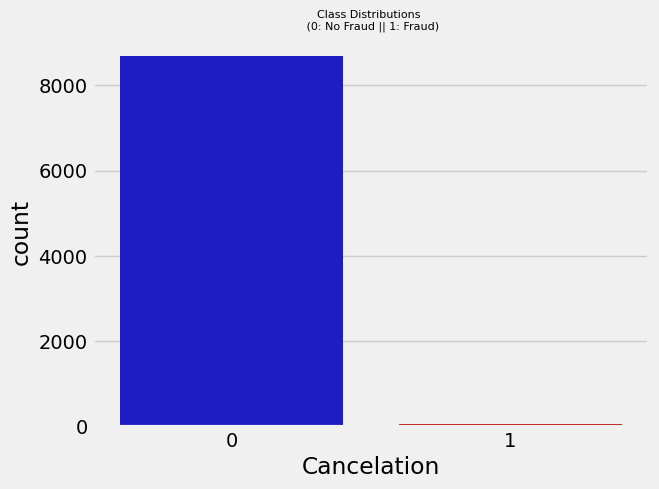

In [ ]:
# Daftar warna kustom
colors = ["#0101DF", "#DF0101"]

# Membuat plot count dengan warna kustom
sns.countplot(data=df, x='Cancelation', palette=colors)
plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)', fontsize=8)


# Menampilkan plot
plt.show()

###Handling Missing Values

In [ ]:
# checking for null values

null = pd.DataFrame({'Null Values' : df.isna().sum(), 'Percentage Null Values' : (df.isna().sum()) / (df.shape[0]) * (100)})
null

,Null Values,Percentage Null Values
Cancelation,0,0.000000
SKU Unit Original Price,115,1.315940
SKU Subtotal Before Discount,115,1.315940
SKU Platform Discount,115,1.315940
SKU Seller Discount,115,1.315940
SKU Subtotal After Discount,115,1.315940
Shipping Fee After Discount,115,1.315940
Original Shipping Fee,115,1.315940
Shipping Fee Platform Discount,115,1.315940
Order Amount,115,1.315940


In [ ]:
# mengganti missing value pada kolom 'Order Refund Amount' dengan nilai 0
df['Order Refund Amount'] = df['Order Refund Amount'].fillna(0)

# menghapus baris yang mengandung missing value pada kolom 'Created Time', 'Shipped Time', dan 'Delivered Time'
df.dropna(subset=['Created Time', 'Shipped Time', 'Delivered Time', 'Delivery Option'], inplace=True)
#(ketiga atribut tersebut sudah bisa menghapus missing value pada atribut lain)

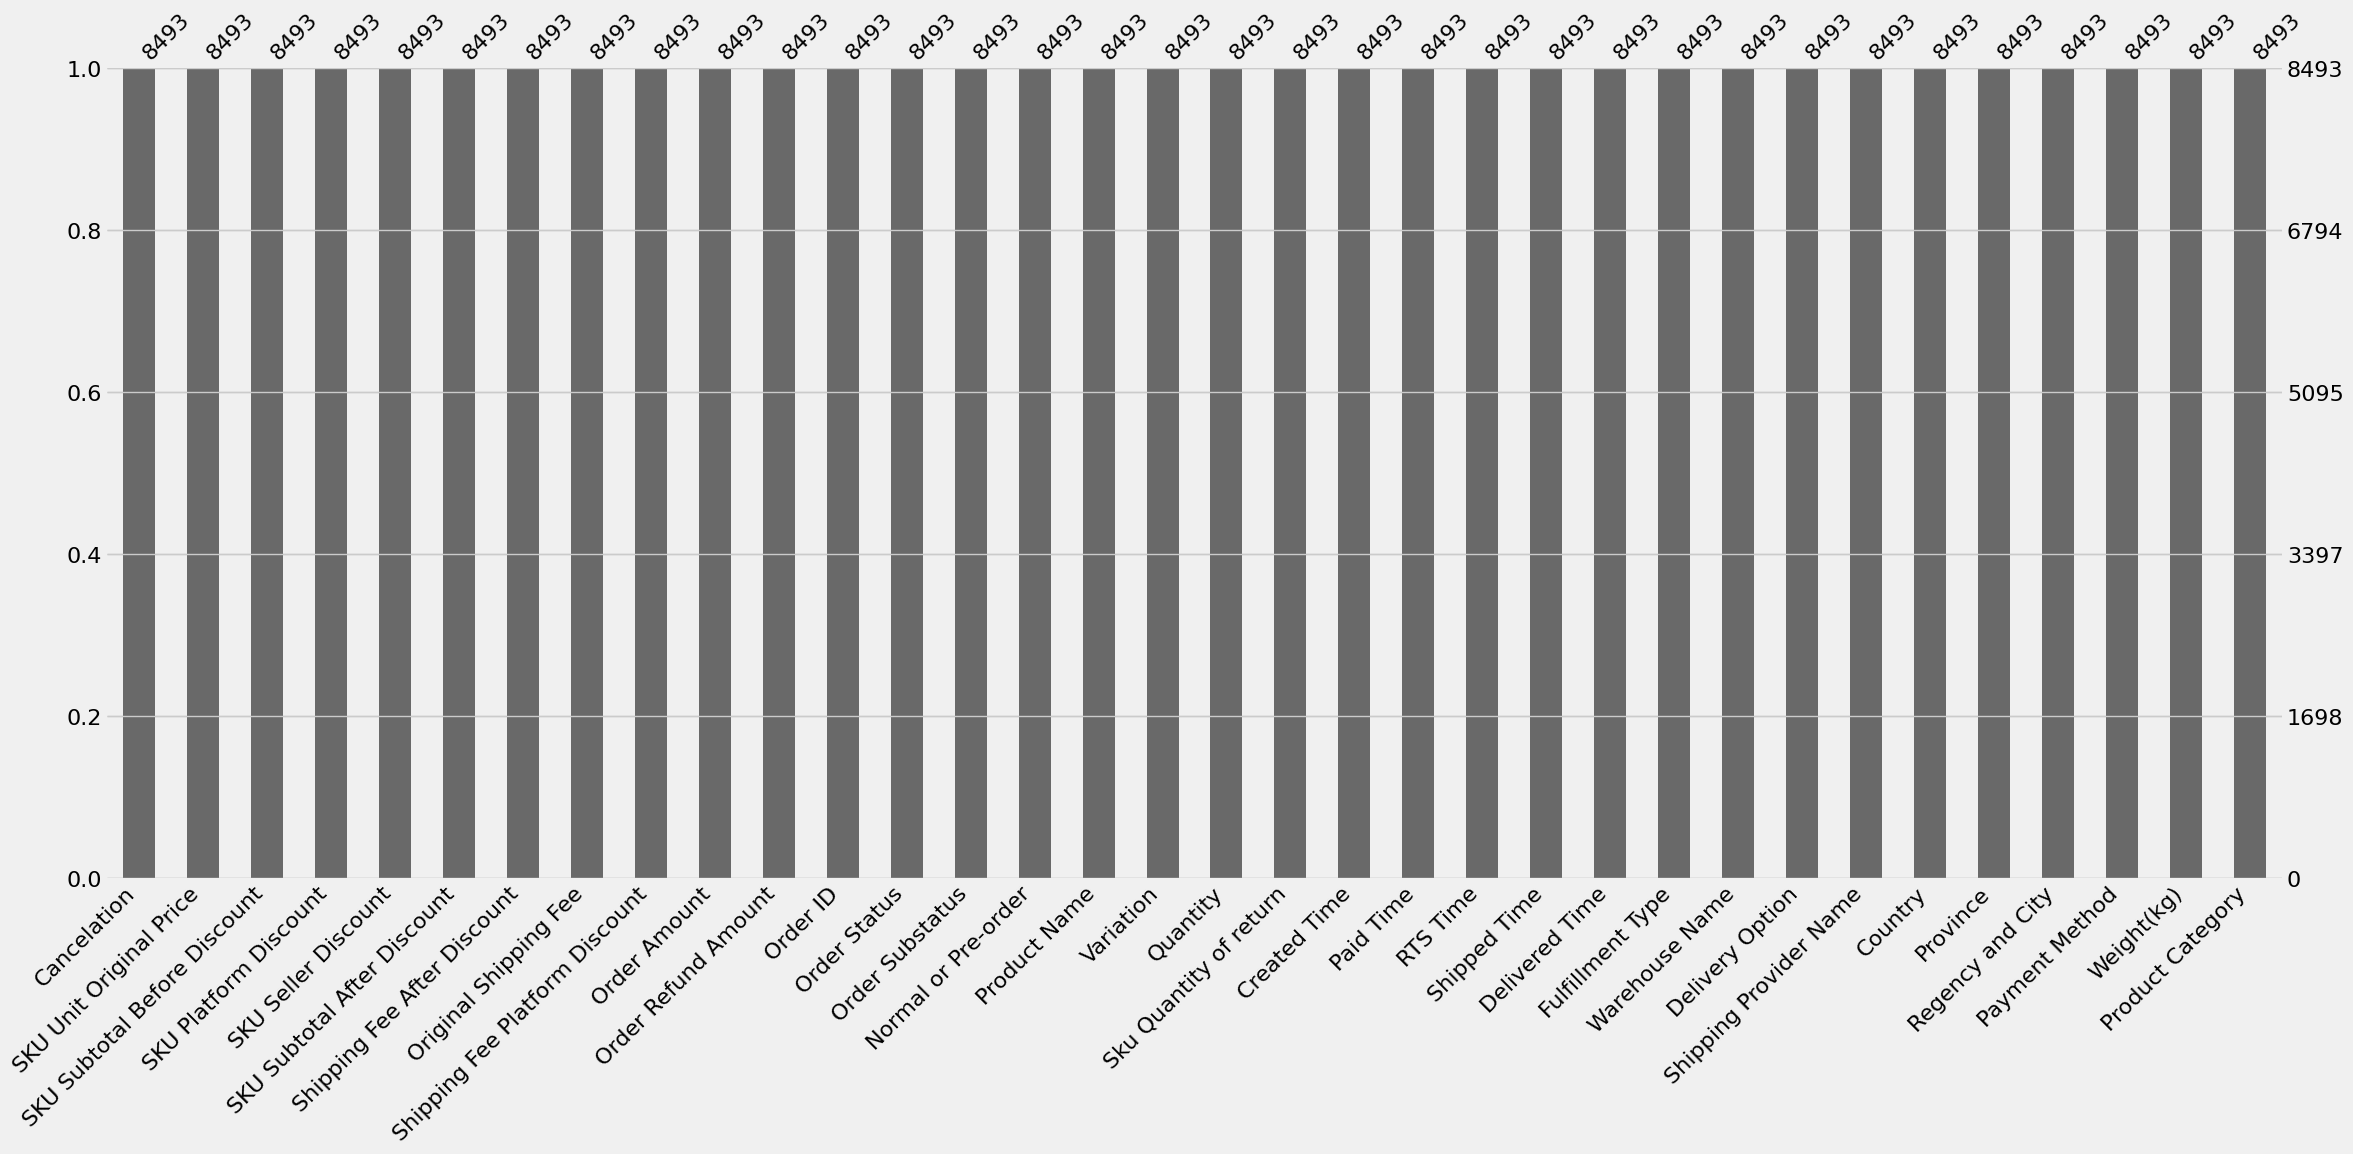

In [ ]:
# visualizing null values
msno.bar(df)
plt.show()

In [ ]:
unique_values = df['Province'].unique()
print(unique_values)

['Jawa Timur' 'Jawa Barat' 'Banten' 'DKI Jakarta' 'Jawa Tengah'
 'Kalimantan Timur' 'Sumatera Utara' 'Jakarta Raya' 'Kepulauan Riau'
 'West Java Province' 'Lampung' 'Daerah Khusus Ibukota Jakarta'
 'West Java' 'Kalimantan Selatan' 'Sumatera Selatan' 'Sumatera Barat'
 'Bali' 'Aceh' 'Papua' 'Sulawesi Selatan' 'Sulawesi Tengah'
 'Kalimantan Tengah' 'Riau' 'Bengkulu' 'Sulawesi Tenggara'
 'Kalimantan Barat' 'DI Yogyakarta' 'Kepulauan Bangka Belitung'
 'Nusa Tenggara Barat' 'East Kalimantan' 'Jambi' 'South Sulawesi Province'
 'Yogyakarta' 'Gorontalo' 'East Java' 'Jakarta Province'
 'Kalimantan Utara' 'South Sumatra' 'North Sumatra' 'East Java Province'
 'Nusa Tenggara Timur' 'Sulawesi Utara' 'Central Java Province'
 'Bangka Belitung' 'Daerah Istimewa Yogyakarta' 'Central Java' 'Jakarta'
 'Papua Barat' 'Sulawesi Barat' 'South Sumatra Province' 'Maluku'
 'Maluku Utara' 'Southeast Sulawesi Province' 'Jambi Province'
 'Banten Province' 'Riau Province']


In [ ]:
provinsi_dict = {
    'Jakarta Province': 'DKI Jakarta',
    'East Kalimantan': 'Kalimantan Timur',
    'East Java Province': 'Jawa Timur',
    'West Java': 'Jawa Barat',
    'East Java': 'Jawa Timur',
    'Jakarta Raya': 'DKI Jakarta',
    'West Java Province': 'Jawa Barat',
    'Jakarta': 'DKI Jakarta',
    'DI Yogyakarta': 'Daerah Istimewa Yogyakarta',
    'Yogyakarta': 'Daerah Istimewa Yogyakarta',
    'Daerah Khusus Ibukota Jakarta': 'DKI Jakarta',
    'Southeast Sulawesi Province': 'Sulawesi Tenggara',
    'Riau Province': 'Riau',
    'Jambi Province': 'Jambi',
    'South Sumatra': 'Sumatera Selatan',
    'South Sulawesi Province': 'Sulawesi Selatan',
    'North Sumatra': 'Sumatera Utara',
    'Central Java Province': 'Jawa Tengah',
    'Central Java': 'Jawa Tengah',
    'Banten Province': 'Banten',
    'South Sumatra Province': 'Sumatera Selatan',
    '': '',
}


df['Province'] = df['Province'].replace(provinsi_dict)

In [ ]:
null = pd.DataFrame({'Null Values' : df.isna().sum(), 'Percentage Null Values' : (df.isna().sum()) / (df.shape[0]) * (100)})
null

,Null Values,Percentage Null Values
Cancelation,0,0.0
SKU Unit Original Price,0,0.0
SKU Subtotal Before Discount,0,0.0
SKU Platform Discount,0,0.0
SKU Seller Discount,0,0.0
SKU Subtotal After Discount,0,0.0
Shipping Fee After Discount,0,0.0
Original Shipping Fee,0,0.0
Shipping Fee Platform Discount,0,0.0
Order Amount,0,0.0


###Exploratory Data Analysis

In [ ]:
#From where the most guests are coming ?.

Province_wise_customer = df[df['Cancelation'] == 1]['Province'].value_counts().reset_index()
Province_wise_customer.columns = ['Province', 'No of customer']
Province_wise_customer

,Province,No of customer
0,Jawa Timur,9
1,Jawa Barat,8
2,Daerah Istimewa Yogyakarta,4
3,Sumatera Selatan,2
4,Bengkulu,2
5,DKI Jakarta,2
6,Banten,1
7,Kepulauan Riau,1
8,Jawa Tengah,1
9,Kalimantan Tengah,1


,Province,No of customer
0,Jawa Timur,9
1,Jawa Barat,8
2,Daerah Istimewa Yogyakarta,4
3,Sumatera Selatan,2
4,Bengkulu,2
5,DKI Jakarta,2
6,Banten,1
7,Kepulauan Riau,1
8,Jawa Tengah,1
9,Kalimantan Tengah,1


In [ ]:
Province_wise_customer = df[df['Cancelation'] == 1]['Regency and City'].value_counts().reset_index()
Province_wise_customer.columns = ['Regency and City', 'No of customer']
Province_wise_customer

,Regency and City,No of customer
0,Kota Depok,5
1,Bantul,3
2,Kabupaten Pamekasan,2
3,Mukomuko,2
4,Kabupaten Bandung,1
5,Kabupaten Malang,1
6,Central Jakarta City,1
7,Kota Bandung,1
8,Kabupaten Banyuwangi,1
9,Kabupaten Trenggalek,1


,Regency and City,No of customer
0,Kota Depok,5
1,Bantul,3
2,Kabupaten Pamekasan,2
3,Mukomuko,2
4,Kabupaten Bandung,1
5,Kabupaten Malang,1
6,Central Jakarta City,1
7,Kota Bandung,1
8,Kabupaten Banyuwangi,1
9,Kabupaten Trenggalek,1


In [ ]:
Product_wise_customer = df[df['Cancelation'] == 1]['Product Name'].value_counts().reset_index()
Product_wise_customer.columns = ['Product Name', 'No of customer']
Product_wise_customer

,Product Name,No of customer
0,Gamis muslimah wanita dan anak,13
1,NOTA LIVE HARGA 150 - 200 RB,4
2,DRESS BRUKAT 707,3
3,NOTA LIVE HARGA 200 - 250 RB,3
4,PO DRESS BRUKAT 707,2
5,NOTA LIVE HARGA 50 - 100 RB,2
6,MELINDA 695,1
7,DRESS BRUKAT 004,1
8,RAYYANA DRESS,1
9,SET BOOKED,1


,Product Name,No of customer
0,Gamis muslimah wanita dan anak,13
1,NOTA LIVE HARGA 150 - 200 RB,4
2,DRESS BRUKAT 707,3
3,NOTA LIVE HARGA 200 - 250 RB,3
4,PO DRESS BRUKAT 707,2
5,NOTA LIVE HARGA 50 - 100 RB,2
6,MELINDA 695,1
7,DRESS BRUKAT 004,1
8,RAYYANA DRESS,1
9,SET BOOKED,1


In [ ]:
Category_wise_customer = df[df['Cancelation'] == 1]['Product Category'].value_counts().reset_index()
Category_wise_customer.columns = ['Product Category', 'No of customer']
Category_wise_customer

,Product Category,No of customer
0,Dresses,14
1,Abayas,11
2,Gamis,6
3,Formal Dresses,1
4,Pyjamas,1


,Product Category,No of customer
0,Dresses,14
1,Abayas,11
2,Gamis,6
3,Formal Dresses,1
4,Pyjamas,1


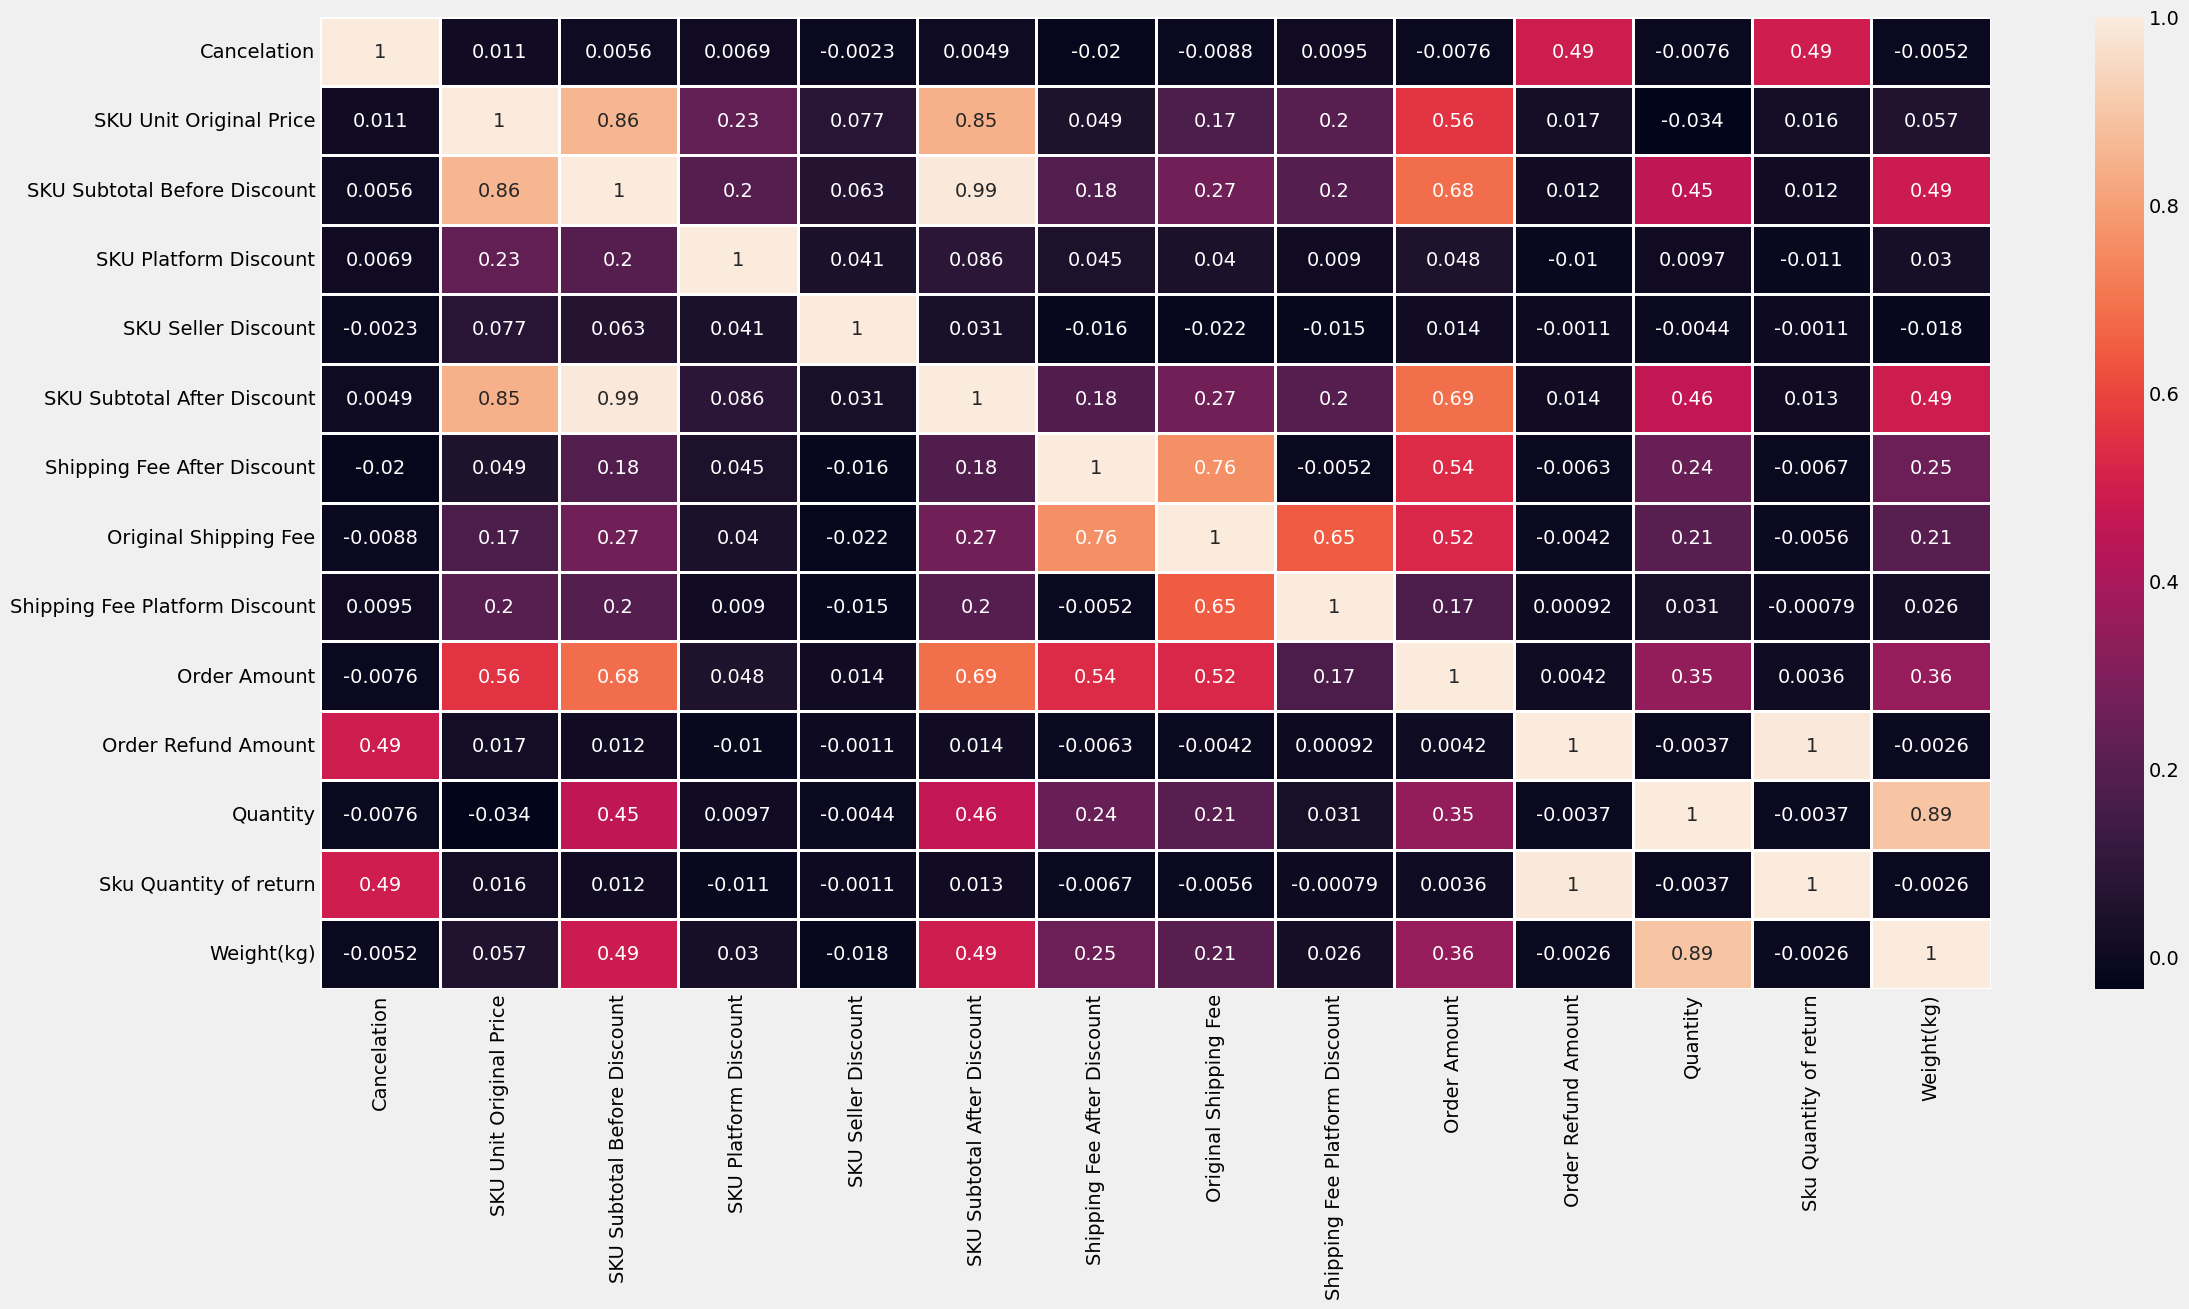

In [ ]:
plt.figure(figsize = (24, 12))

corr = df.corr()
sns.heatmap(corr, annot = True, linewidths = 1)
plt.show()

In [ ]:
correlation = df.corr()['Cancelation'].abs().sort_values(ascending = False)
correlation

Cancelation                       1.000000
Sku Quantity of return            0.491640
Order Refund Amount               0.489350
Shipping Fee After Discount       0.019728
SKU Unit Original Price           0.010624
Shipping Fee Platform Discount    0.009472
Original Shipping Fee             0.008845
Order Amount                      0.007579
Quantity                          0.007554
SKU Platform Discount             0.006907
SKU Subtotal Before Discount      0.005580
Weight(kg)                        0.005241
SKU Subtotal After Discount       0.004940
SKU Seller Discount               0.002253
Name: Cancelation, dtype: float64

In [ ]:
# dropping columns that are not useful

useless_col = ['Normal or Pre-order', 'Order ID', 'Order Status', 'Paid Time', 'RTS Time', 'Shipped Time', 'Delivered Time',
               'Order Substatus', 'Country', 'Fulfillment Type', 'Warehouse Name', 'Shipping Provider Name']

df.drop(useless_col, axis = 1, inplace = True)

In [ ]:
df.head()

,Cancelation,SKU Unit Original Price,SKU Subtotal Before Discount,SKU Platform Discount,SKU Seller Discount,SKU Subtotal After Discount,Shipping Fee After Discount,Original Shipping Fee,Shipping Fee Platform Discount,Order Amount,Order Refund Amount,Product Name,Variation,Quantity,Sku Quantity of return,Created Time,Delivery Option,Province,Regency and City,Payment Method,Weight(kg),Product Category
2,0,99000.0,99000.0,0.0,0.0,99000.0,12189.0,12189.0,0.0,111189.0,0.0,Gamis muslimah wanita dan anak,26A,1.0,0.0,2023-02-15,Pengiriman standar,Jawa Timur,Banyuwangi,Cash on delivery,1.0,Gamis
3,0,172000.0,172000.0,0.0,0.0,172000.0,0.0,18752.0,18752.0,172000.0,0.0,Gamis muslimah wanita dan anak,1A,1.0,0.0,2023-02-14,Pengiriman standar,Jawa Barat,Bekasi,Cash on delivery,1.0,Gamis
4,0,188000.0,188000.0,5000.0,0.0,183000.0,5941.0,30941.0,25000.0,188941.0,0.0,Gamis muslimah wanita dan anak,8A,1.0,0.0,2023-02-14,Pengiriman standar,Banten,Kabupaten Tangerang,Cash on delivery,1.0,Gamis
5,0,188000.0,188000.0,5000.0,0.0,183000.0,0.0,12189.0,12189.0,183000.0,0.0,Gamis muslimah wanita dan anak,6A,1.0,0.0,2023-02-14,Pengiriman standar,Jawa Timur,Kabupaten Sidoarjo,Cash on delivery,1.0,Gamis
6,0,195000.0,195000.0,0.0,0.0,195000.0,19690.0,19690.0,0.0,214690.0,0.0,Gamis muslimah wanita dan anak,23A,1.0,0.0,2023-02-14,Pengiriman standar,Jawa Barat,Karawang,Cash on delivery,1.0,Gamis


In [ ]:
# categorical dataframes

cat_cols = [col for col in df.columns if df[col].dtype == 'O']
cat_cols

['Product Name',
 'Variation',
 'Created Time',
 'Delivery Option',
 'Province',
 'Regency and City',
 'Payment Method',
 'Product Category']

In [ ]:
cat_df = df[cat_cols]
cat_df.head()

,Product Name,Variation,Created Time,Delivery Option,Province,Regency and City,Payment Method,Product Category
2,Gamis muslimah wanita dan anak,26A,2023-02-15,Pengiriman standar,Jawa Timur,Banyuwangi,Cash on delivery,Gamis
3,Gamis muslimah wanita dan anak,1A,2023-02-14,Pengiriman standar,Jawa Barat,Bekasi,Cash on delivery,Gamis
4,Gamis muslimah wanita dan anak,8A,2023-02-14,Pengiriman standar,Banten,Kabupaten Tangerang,Cash on delivery,Gamis
5,Gamis muslimah wanita dan anak,6A,2023-02-14,Pengiriman standar,Jawa Timur,Kabupaten Sidoarjo,Cash on delivery,Gamis
6,Gamis muslimah wanita dan anak,23A,2023-02-14,Pengiriman standar,Jawa Barat,Karawang,Cash on delivery,Gamis


In [ ]:
cat_df['Created Time'] = pd.to_datetime(cat_df['Created Time'])

cat_df['year'] = cat_df['Created Time'].dt.year
cat_df['month'] = cat_df['Created Time'].dt.month
cat_df['day'] = cat_df['Created Time'].dt.day

In [ ]:
cat_df.drop(['Created Time'] , axis = 1, inplace = True)

In [ ]:
cat_df.head()

,Product Name,Variation,Delivery Option,Province,Regency and City,Payment Method,Product Category,year,month,day
2,Gamis muslimah wanita dan anak,26A,Pengiriman standar,Jawa Timur,Banyuwangi,Cash on delivery,Gamis,2023,2,15
3,Gamis muslimah wanita dan anak,1A,Pengiriman standar,Jawa Barat,Bekasi,Cash on delivery,Gamis,2023,2,14
4,Gamis muslimah wanita dan anak,8A,Pengiriman standar,Banten,Kabupaten Tangerang,Cash on delivery,Gamis,2023,2,14
5,Gamis muslimah wanita dan anak,6A,Pengiriman standar,Jawa Timur,Kabupaten Sidoarjo,Cash on delivery,Gamis,2023,2,14
6,Gamis muslimah wanita dan anak,23A,Pengiriman standar,Jawa Barat,Karawang,Cash on delivery,Gamis,2023,2,14


In [ ]:
# printing unique values of each column
for col in cat_df.columns:
    print(f"{col}: \n{cat_df[col].unique()}\n")

Product Name: 
['Gamis muslimah wanita dan anak' 'DRESS BRUKAT KODE 703'
 'DRESS BRUKAT KODE 684' 'GAMIS MUSLIMAH WANITA' 'DRESS BRUKAT KODE 694'
 'DRESS BRUKAT KODE 707' 'ABIYA MUKENA' 'AQILA DRESS EXCLUSIVE'
 'DRESS BRUKAT KODE 680' 'AUREL DRESS EXCLUSIVE by LARISSTORE'
 'RAINA ABAYA' 'KIMMOURA DRESS BRUKAT KODE 681' 'MAIRA DRESS EXCLUSIVE'
 'MALIKA DRESS EXCLUSIVE' 'DRESS BRUKAT 002' 'Gamis muslimah wanita'
 'DRESS MAINA 26256 A' 'ELEA DRESS' 'DRESS BRUKAT KODE 540'
 'SHANTIKA DRESS KODE 468' 'VANESS DRESS' 'DRESS BRUKAT KODE 26198 J'
 'DRESS ADENA' 'DRESS BRUKAT KODE 25934 FP' 'DRESS BRUKAT KODE 676'
 'DRESS BRUKAT KODE 712' 'RENATA BLOUSE' 'GAMIS HANNA' 'DRESS KODE 5905'
 'DRESS KODE C02' 'DRESS KODE C01' 'DRESS KODE C03' 'DRESS KODE M67'
 'DRESS BRUKAT KODE 26229 D' 'YOURA DRESS' 'DRESS BRUKAT KODE 682'
 'DRESS BRUKAT KODE 26195 J' 'ISYANA DRESS' 'ARINDA SETROK'
 'DRESS BRUKAT KODE 683' 'AVIKA DRESS KODE 38' 'MELINDA 695'
 'DRESS ARIESTA' 'ARIKA SET ROK' 'DRESS BRUKAT 707' 'AGNIA

In [ ]:
cat_df.head()

,Product Name,Variation,Delivery Option,Province,Regency and City,Payment Method,Product Category,year,month,day
2,Gamis muslimah wanita dan anak,26A,Pengiriman standar,Jawa Timur,Banyuwangi,Cash on delivery,Gamis,2023,2,15
3,Gamis muslimah wanita dan anak,1A,Pengiriman standar,Jawa Barat,Bekasi,Cash on delivery,Gamis,2023,2,14
4,Gamis muslimah wanita dan anak,8A,Pengiriman standar,Banten,Kabupaten Tangerang,Cash on delivery,Gamis,2023,2,14
5,Gamis muslimah wanita dan anak,6A,Pengiriman standar,Jawa Timur,Kabupaten Sidoarjo,Cash on delivery,Gamis,2023,2,14
6,Gamis muslimah wanita dan anak,23A,Pengiriman standar,Jawa Barat,Karawang,Cash on delivery,Gamis,2023,2,14


In [ ]:
## encoding categorical variables
from sklearn.preprocessing import LabelEncoder
# Membuat objek LabelEncoder
le = LabelEncoder()

# Melakukan encoding pada variabel
cat_df['Province'] = le.fit_transform(cat_df['Province'])

cat_df['Delivery Option'] = le.fit_transform(cat_df['Delivery Option'])

cat_df['Product Name'] =le.fit_transform(cat_df['Product Name'])

cat_df['Variation'] = le.fit_transform(cat_df['Variation'])

cat_df['Regency and City'] = le.fit_transform(cat_df['Regency and City'])

cat_df['Payment Method'] = le.fit_transform(cat_df['Payment Method'])

cat_df['Product Category'] = le.fit_transform(cat_df['Product Category'])


In [ ]:
cat_df.head()

,Product Name,Variation,Delivery Option,Province,Regency and City,Payment Method,Product Category,year,month,day
2,118,105,0,11,12,4,8,2023,2,15
3,118,70,0,9,16,4,8,2023,2,14
4,118,241,0,3,297,4,8,2023,2,14
5,118,210,0,11,271,4,8,2023,2,14
6,118,91,0,9,322,4,8,2023,2,14


In [ ]:
cat_df['year'] = cat_df['year'].map({2021: 0, 2022: 1, 2023: 2})

In [ ]:
cat_df.head()

,Product Name,Variation,Delivery Option,Province,Regency and City,Payment Method,Product Category,year,month,day
2,118,105,0,11,12,4,8,2,2,15
3,118,70,0,9,16,4,8,2,2,14
4,118,241,0,3,297,4,8,2,2,14
5,118,210,0,11,271,4,8,2,2,14
6,118,91,0,9,322,4,8,2,2,14


In [ ]:
# printing unique values of each column
for col in cat_df.columns:
    print(f"{col}: \n{cat_df[col].unique()}\n")


Product Name: 
[118  74  70 114  73  75   0  12  66  19 196 131 143 144  46 117  94 100
  59 222 229  56  40  53  64  77 200 112  89  91  90  92  93  57 235  68
  54 121  17  69  22 151  43  16  50   3   1   2 130  52  80  55 150  13
 102  72   4  49  99 206  48 123 205 159 221 137 191  97 193  32 158  71
  67  78 197  63  98  96  61  65  44  60  42 161 212  62  47 160  95 152
  41 128 135 198 203 202  36 157  21 236 170 219 136 110 142  15 166 149
 146  31  79  24  33  14  37 153  45 139  34 217 216 218 127 195  87  25
 215 101  27 106  76  35 163 231 105  86  83  84 225  82   5  38 148  51
  26  88 199 113  85  58 156 228 227 208 214 192 171  28 109 124 169 226
 120 115 147 233 116 211 119 164 129   9  29 126 213   8 220 210 209  20
  39 103 224 167 232  10 230  81 125 238 162 207  23  11 190 132 223 155
 138   7 133 108 165 204 145 168 234 111 194  18 140 134 107 237 201 141
 154 104  30 188 122   6 172 174 178 186 181 175 173 239 189 187 177 180
 179 185 176 184 183 182]

Variation

In [ ]:
# printing unique values of each column in ascending order
for col in cat_df.columns:
    print(f"{col}: \n{sorted(cat_df[col].unique())}\n")

Product Name: 
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218,

In [ ]:
num_df = df.drop(columns = cat_cols, axis = 1)
num_df.drop('Cancelation', axis = 1, inplace = True)
num_df

,SKU Unit Original Price,SKU Subtotal Before Discount,SKU Platform Discount,SKU Seller Discount,SKU Subtotal After Discount,Shipping Fee After Discount,Original Shipping Fee,Shipping Fee Platform Discount,Order Amount,Order Refund Amount,Quantity,Sku Quantity of return,Weight(kg)
2,99000.0,99000.0,0.0,0.0,99000.0,12189.0,12189.0,0.0,111189.0,0.0,1.0,0.0,1.0
3,172000.0,172000.0,0.0,0.0,172000.0,0.0,18752.0,18752.0,172000.0,0.0,1.0,0.0,1.0
4,188000.0,188000.0,5000.0,0.0,183000.0,5941.0,30941.0,25000.0,188941.0,0.0,1.0,0.0,1.0
5,188000.0,188000.0,5000.0,0.0,183000.0,0.0,12189.0,12189.0,183000.0,0.0,1.0,0.0,1.0
6,195000.0,195000.0,0.0,0.0,195000.0,19690.0,19690.0,0.0,214690.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8634,89000.0,89000.0,0.0,0.0,89000.0,0.0,16128.0,16128.0,89000.0,0.0,1.0,0.0,1.0
8635,50000.0,50000.0,0.0,0.0,50000.0,1504.0,21504.0,20000.0,51504.0,0.0,1.0,0.0,1.0
8636,50000.0,50000.0,0.0,0.0,50000.0,0.0,19354.0,19354.0,50000.0,0.0,1.0,0.0,1.0
8637,110000.0,220000.0,0.0,0.0,220000.0,966.0,20966.0,20000.0,220966.0,0.0,2.0,0.0,2.0


In [ ]:
num_df.var()

SKU Unit Original Price           3.247892e+09
SKU Subtotal Before Discount      4.534942e+09
SKU Platform Discount             5.921796e+07
SKU Seller Discount               3.438296e+06
SKU Subtotal After Discount       4.375492e+09
Shipping Fee After Discount       1.908738e+08
Original Shipping Fee             3.291779e+08
Shipping Fee Platform Discount    1.400060e+08
Order Amount                      1.024541e+10
Order Refund Amount               3.443075e+07
Quantity                          4.340648e-02
Sku Quantity of return            9.411757e-04
Weight(kg)                        5.425759e-02
dtype: float64

In [ ]:
# normalizing numerical variables

num_df['Order Refund Amount'] = np.log(num_df['Order Refund Amount'] + 1)
num_df['SKU Unit Original Price'] = np.log(num_df['SKU Unit Original Price'] + 1)
num_df['SKU Subtotal Before Discount'] = np.log(num_df['SKU Subtotal Before Discount'] + 1)
num_df['SKU Platform Discount'] = np.log(num_df['SKU Platform Discount'] + 1)
num_df['SKU Seller Discount'] = np.log(num_df['SKU Seller Discount'] + 1)
num_df['SKU Subtotal After Discount'] = np.log(num_df['SKU Subtotal After Discount'] + 1)
num_df['Shipping Fee After Discount'] = np.log(num_df['Shipping Fee After Discount'] + 1)
num_df['Original Shipping Fee'] = np.log(num_df['Original Shipping Fee'] + 1)
num_df['Shipping Fee Platform Discount'] = np.log(num_df['Shipping Fee Platform Discount'] + 1)
num_df['Order Amount'] = np.log(num_df['Order Amount'] + 1)

In [ ]:
num_df.var()

SKU Unit Original Price            0.219775
SKU Subtotal Before Discount       0.226100
SKU Platform Discount             14.649970
SKU Seller Discount                0.171098
SKU Subtotal After Discount        0.224171
Shipping Fee After Discount       20.797272
Original Shipping Fee              0.417519
Shipping Fee Platform Discount    11.322172
Order Amount                       0.231359
Order Refund Amount                0.138982
Quantity                           0.043406
Sku Quantity of return             0.000941
Weight(kg)                         0.054258
dtype: float64

In [ ]:
num_df.head()

,SKU Unit Original Price,SKU Subtotal Before Discount,SKU Platform Discount,SKU Seller Discount,SKU Subtotal After Discount,Shipping Fee After Discount,Original Shipping Fee,Shipping Fee Platform Discount,Order Amount,Order Refund Amount,Quantity,Sku Quantity of return,Weight(kg)
2,11.502885,11.502885,0.000000,0.0,11.502885,9.408371,9.408371,0.000000,11.618996,0.0,1.0,0.0,1.0
3,12.055256,12.055256,0.000000,0.0,12.055256,0.000000,9.839109,9.839109,12.055256,0.0,1.0,0.0,1.0
4,12.144203,12.144203,8.517393,0.0,12.117247,8.689801,10.339870,10.126671,12.149195,0.0,1.0,0.0,1.0
5,12.144203,12.144203,8.517393,0.0,12.117247,0.000000,9.408371,9.408371,12.117247,0.0,1.0,0.0,1.0
6,12.180760,12.180760,0.000000,0.0,12.180760,9.887917,9.887917,0.000000,12.276955,0.0,1.0,0.0,1.0


###Oversampling

In [ ]:
X = pd.concat([cat_df, num_df], axis = 1)
y = df['Cancelation']

Jumlah data sebelum oversampling:
0    8460
1      33
Name: Cancelation, dtype: int64

Jumlah data setelah oversampling:
0    8460
1    8460
Name: Cancelation, dtype: int64


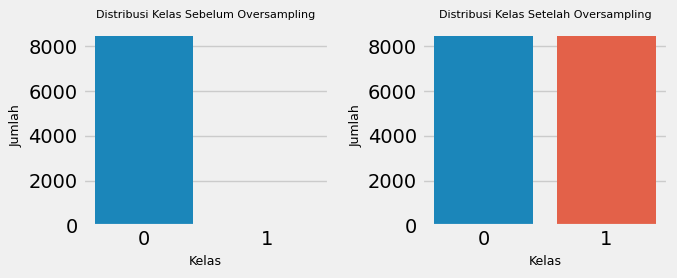

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)

# Hitung distribusi kelas sebelum dan setelah oversampling
class_distribution_before = y.value_counts()
class_distribution_after = pd.Series(y_resampled).value_counts()

print("Jumlah data sebelum oversampling:")
print(y.value_counts())

print("\nJumlah data setelah oversampling:")
print(y_resampled.value_counts())

# Plot diagram distribusi kelas sebelum dan setelah oversampling
plt.figure(figsize=(7, 3))
plt.subplot(1, 2, 1)
sns.barplot(x=class_distribution_before.index, y=class_distribution_before.values)
plt.title('Distribusi Kelas Sebelum Oversampling', fontsize=8)
plt.xlabel('Kelas', fontsize=9)
plt.ylabel('Jumlah', fontsize=9)

plt.subplot(1, 2, 2)
sns.barplot(x=class_distribution_after.index, y=class_distribution_after.values)
plt.title('Distribusi Kelas Setelah Oversampling', fontsize=8)
plt.xlabel('Kelas', fontsize=9)
plt.ylabel('Jumlah', fontsize=9)

plt.tight_layout()
plt.show()

###PCA - Train-Test Split

In [ ]:
# Menghitung matriks kovarian
cov_matrix = pd.DataFrame(X_resampled, columns=X.columns).cov()

# Menampilkan matriks kovarian
print("Matriks Kovarian:")
print(cov_matrix.to_string())

Matriks Kovarian:
                                Product Name     Variation  Delivery Option    Province  Regency and City  Payment Method  Product Category      year       month         day  SKU Unit Original Price  SKU Subtotal Before Discount  SKU Platform Discount  SKU Seller Discount  SKU Subtotal After Discount  Shipping Fee After Discount  Original Shipping Fee  Shipping Fee Platform Discount  Order Amount  Order Refund Amount  Quantity  Sku Quantity of return  Weight(kg)
Product Name                     1831.723553  -3253.532309              0.0  -64.826627        276.389438      -22.999082        -62.084187 -1.855801 -108.986429   40.057698                 1.071603                      0.995372              47.106474             0.145445                     0.319178                    41.826400               4.407597                        9.740458      0.190083           -32.699335 -0.152673               -2.716285   -0.205583
Variation                       -3253.532309  24

In [ ]:
from sklearn.decomposition import PCA
# Melakukan PCA dengan 4 komponen utama
pca = PCA(n_components=12)
X_pca = pca.fit_transform(X_resampled)


# Menampilkan eigenvalues
eigenvalues = pca.explained_variance_
eigenvalues_table = pd.DataFrame({'Eigenvalue': eigenvalues}, index=range(1, len(eigenvalues)+1))
eigenvalues_table.index.name = 'Component'
print("Eigenvalues:")
print(eigenvalues_table.to_string())

# Menampilkan eigenvectors
eigenvectors = pca.components_
eigenvectors_table = pd.DataFrame(eigenvectors, columns=X.columns, index=range(1, len(eigenvectors)+1))
eigenvectors_table.index.name = 'Component'
print("Eigenvectors:")
print(eigenvectors_table.to_string())

# Menghitung proporsi variasi yang dijelaskan oleh setiap komponen
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = explained_variance_ratio.cumsum()

# Menampilkan kesimpulan
print("\nKesimpulan:")
for i in range(len(eigenvalues)):
    print(f"Komponen {i+1}: Variasi= {explained_variance_ratio[i]:.4f}, Kumulatif Variasi = {cumulative_variance_ratio[i]:.4f}")

Eigenvalues:
             Eigenvalue
Component              
1          26329.519741
2          15759.393308
3           1383.682796
4             55.499416
5             45.181422
6             16.733762
7             13.024390
8             10.986407
9             10.076593
10             6.779812
11             3.971590
12             1.665740
Eigenvectors:
           Product Name  Variation  Delivery Option  Province  Regency and City  Payment Method  Product Category      year     month       day  SKU Unit Original Price  SKU Subtotal Before Discount  SKU Platform Discount  SKU Seller Discount  SKU Subtotal After Discount  Shipping Fee After Discount  Original Shipping Fee  Shipping Fee Platform Discount  Order Amount  Order Refund Amount      Quantity  Sku Quantity of return  Weight(kg)
Component                                                                                                                                                                                           

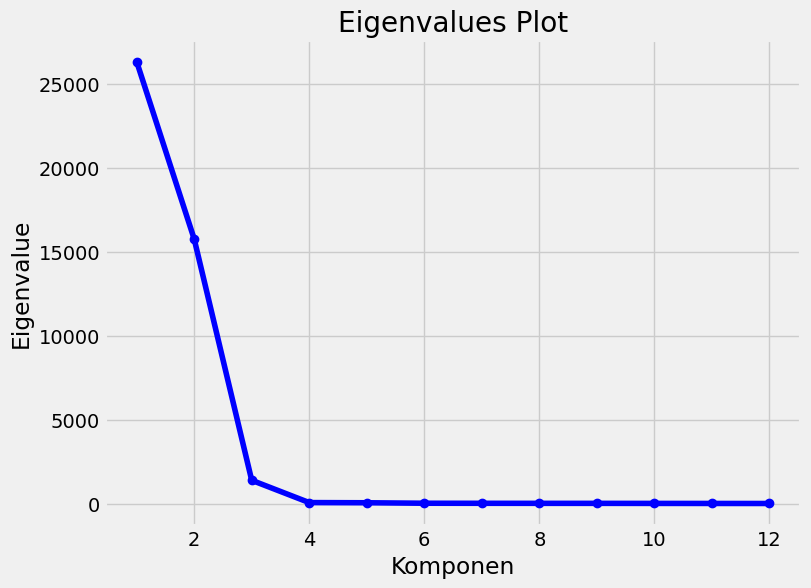

In [ ]:
# Nomor komponen
components = range(1, len(eigenvalues)+1)

# Memplot eigenvalues
plt.figure(figsize=(8, 6))
plt.plot(components, eigenvalues, marker='o', linestyle='-', color='b')
plt.xlabel('Komponen')
plt.ylabel('Eigenvalue')
plt.title('Eigenvalues Plot')
plt.grid(True)
plt.show()

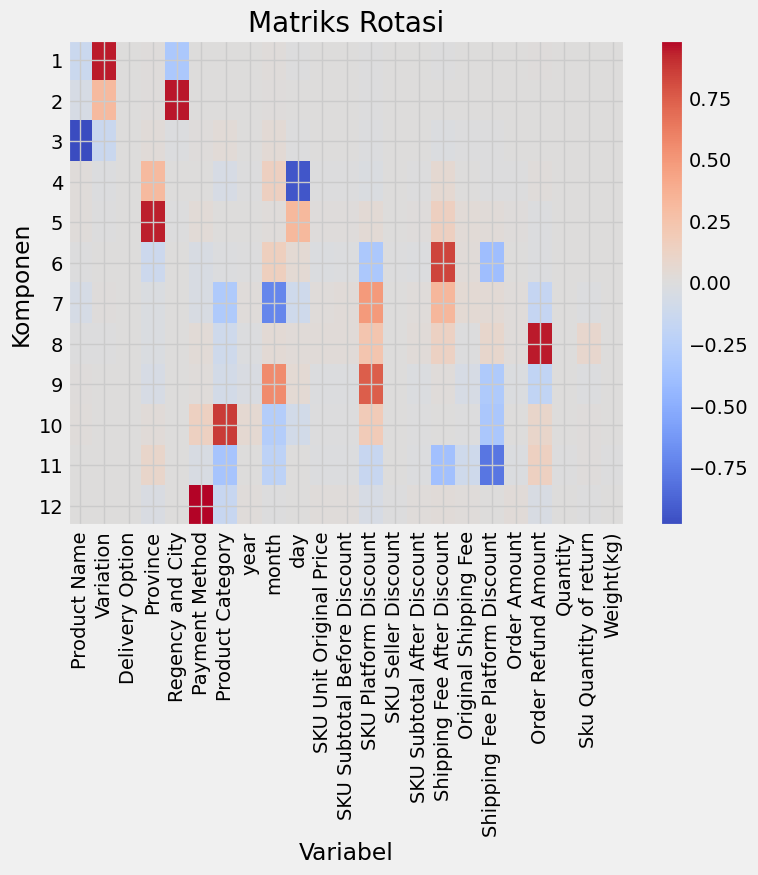

In [ ]:
# Matriks rotasi
rotation_matrix = pca.components_

# Menampilkan nama variabel
variable_names = X.columns

# Memplot matriks rotasi
plt.figure(figsize=(8, 6))
plt.imshow(rotation_matrix, cmap='coolwarm', aspect='auto')
plt.colorbar()
plt.xticks(range(len(variable_names)), variable_names, rotation=90)
plt.yticks(range(len(rotation_matrix)), range(1, len(rotation_matrix)+1))
plt.xlabel('Variabel')
plt.ylabel('Komponen')
plt.title('Matriks Rotasi')
plt.show()

In [ ]:
rotation_matrix = pca.components_
variable_names = X.columns

# Menampilkan nilai matriks rotasi di atas 0
for i, variable in enumerate(variable_names):
    for j, component in enumerate(range(1, len(rotation_matrix)+1)):
        if rotation_matrix[j][i] > 0.5:
            print(f"Variabel: {variable}, Komponen: {component}, Nilai: {rotation_matrix[j][i]}")


Variabel: Variation, Komponen: 1, Nilai: 0.9401775272637973
Variabel: Province, Komponen: 5, Nilai: 0.9337955318524219
Variabel: Regency and City, Komponen: 2, Nilai: 0.9491176779918866
Variabel: Payment Method, Komponen: 12, Nilai: 0.984422323603866
Variabel: Product Category, Komponen: 10, Nilai: 0.8657816098937055
Variabel: month, Komponen: 9, Nilai: 0.5577205569015307
Variabel: SKU Platform Discount, Komponen: 9, Nilai: 0.7379371931419724
Variabel: Shipping Fee After Discount, Komponen: 6, Nilai: 0.837213217947374
Variabel: Order Refund Amount, Komponen: 8, Nilai: 0.9453993409751985


Eigenvalues:
             Eigenvalue
Component              
1          26329.519741
2          15759.393308
3           1383.682796
4             55.499416
5             45.181422
6             16.733762
7             13.024390
8             10.986407
9             10.076593
10             6.779812
11             3.971590
12             1.665740
Cumulative Variance Ratio:
           Cumulative Variance Ratio
Component                           
1                           0.603371
2                           0.964516
3                           0.996225
4                           0.997497
5                           0.998532
6                           0.998915
7                           0.999214
8                           0.999466
9                           0.999697
10                          0.999852
11                          0.999943
12                          0.999981


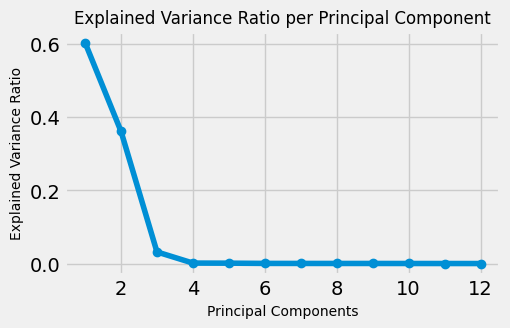

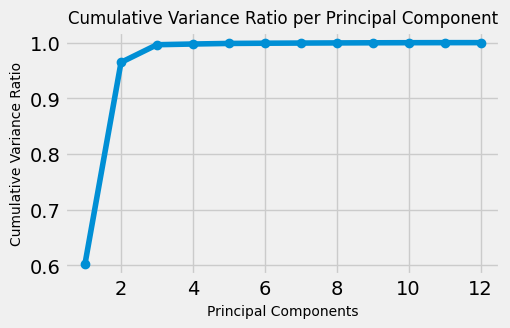

In [ ]:
# Menampilkan eigenvalues
eigenvalues = pca.explained_variance_
eigenvalues_table = pd.DataFrame({'Eigenvalue': eigenvalues}, index=range(1, len(eigenvalues)+1))
eigenvalues_table.index.name = 'Component'
print("Eigenvalues:")
print(eigenvalues_table.to_string())


# Menampilkan kumulatif variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)
cumulative_variance_table = pd.DataFrame({'Cumulative Variance Ratio': cumulative_variance_ratio}, index=range(1, len(cumulative_variance_ratio)+1))
cumulative_variance_table.index.name = 'Component'
print("Cumulative Variance Ratio:")
print(cumulative_variance_table.to_string())

# Menampilkan grafik eksplorasi varians
import matplotlib.pyplot as plt
plt.figure(figsize=(5, 3))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o')
plt.xlabel('Principal Components', fontsize=10)
plt.ylabel('Explained Variance Ratio', fontsize=10)
plt.title('Explained Variance Ratio per Principal Component', fontsize=12)
plt.savefig('/content/drive/MyDrive/my work in collage/Skripsi/explained_variance_ratio.png')
plt.show()

# Plotting cumulative variance ratio
plt.figure(figsize=(5, 3))
plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, marker='o')
plt.xlabel('Principal Components', fontsize=10)
plt.ylabel('Cumulative Variance Ratio', fontsize=10)
plt.title('Cumulative Variance Ratio per Principal Component', fontsize=12)
plt.savefig('/content/drive/MyDrive/my work in collage/Skripsi/cumulative_variance_ratio.png')
plt.show()

In [ ]:
eigenvectors = pca.components_
eigenvectors_table = pd.DataFrame(eigenvectors, columns=X.columns, index=range(1, len(eigenvectors)+1))
eigenvectors_table.index.name = 'Component'
print("Eigenvectors:")
print(eigenvectors_table.to_string())

Eigenvectors:
           Product Name  Variation  Delivery Option  Province  Regency and City  Payment Method  Product Category      year     month       day  SKU Unit Original Price  SKU Subtotal Before Discount  SKU Platform Discount  SKU Seller Discount  SKU Subtotal After Discount  Shipping Fee After Discount  Original Shipping Fee  Shipping Fee Platform Discount  Order Amount  Order Refund Amount      Quantity  Sku Quantity of return  Weight(kg)
Component                                                                                                                                                                                                                                                                                                                                                                                                                                               
1             -0.128562   0.940178     0.000000e+00  0.009190         -0.314651        0.003012         

In [ ]:
selected_variables = []
for i, variable in enumerate(variable_names):
    for j, component in enumerate(range(1, len(rotation_matrix)+1)):
        if rotation_matrix[j][i] > 0.5:
            selected_variables.append(variable)
            break

# Memilih variabel yang nilai matriks rotasinya di atas 0.5
X_selected = X_resampled[selected_variables]

# Melakukan train-test split pada X_selected
X_train, X_test, y_train, y_test = train_test_split(X_selected, y_resampled, test_size=0.2, random_state=42)

print("Dimensi data latih (X_train):", X_train.shape)
print("Dimensi data uji (X_test):", X_test.shape)

Dimensi data latih (X_train): (13536, 9)
Dimensi data uji (X_test): (3384, 9)


In [ ]:
(X_test)

,Variation,Province,Regency and City,Payment Method,Product Category,month,SKU Platform Discount,Shipping Fee After Discount,Order Refund Amount
11648,40,7,366,1,2,2,0.000000,8.567285,4.678905
13679,94,6,11,1,0,2,0.000000,8.203851,0.000000
169,55,3,181,4,8,2,0.000000,10.339870,0.000000
12618,105,10,314,1,0,3,8.740755,0.000000,0.000000
15778,431,17,21,4,5,11,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...
6712,39,5,353,1,0,3,0.000000,0.000000,0.000000
8481,178,11,271,6,0,1,0.000000,0.000000,0.000000
13280,63,6,356,2,3,1,0.000000,5.277813,0.000000
8309,27,11,122,1,0,1,0.000000,0.000000,0.000000


##Modeling

###Cat Boost Classifier

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
# Membuat objek CatBoostClassifier
cat = CatBoostClassifier()

# Menentukan grid parameter yang akan dioptimasi
param_grid = {
    'iterations': [500, 1000, 2000],
    'depth': [1, 3, 6, 10],
    'learning_rate': [0.012, 0.055, 0.064, 0.1],
    'l2_leaf_reg': [1, 3, 5]
}

# Membuat objek RandomizedSearchCV
random_search = RandomizedSearchCV(cat, param_distributions=param_grid, scoring='accuracy', n_iter=10)

# Melakukan pencarian parameter terbaik
random_search.fit(X_train, y_train)

# Menampilkan hasil parameter terbaik
print("Parameter Terbaik:")
print(random_search.best_params_)

# Menampilkan semua hasil parameter
print("\nSemua Hasil Parameter:")
means = random_search.cv_results_['mean_test_score']
stds = random_search.cv_results_['std_test_score']
params = random_search.cv_results_['params']
for mean, std, param in zip(means, stds, params):
    print(f"Accuracy: {mean:.4f} (+/- {std:.4f}) for {param}")

Streaming output truncated to the last 5000 lines.
514:	learn: 0.2867118	total: 1.47s	remaining: 1.38s
515:	learn: 0.2865709	total: 1.47s	remaining: 1.38s
516:	learn: 0.2864342	total: 1.47s	remaining: 1.37s
517:	learn: 0.2862967	total: 1.47s	remaining: 1.37s
518:	learn: 0.2861438	total: 1.47s	remaining: 1.37s
519:	learn: 0.2860125	total: 1.48s	remaining: 1.36s
520:	learn: 0.2858270	total: 1.48s	remaining: 1.36s
521:	learn: 0.2856820	total: 1.48s	remaining: 1.36s
522:	learn: 0.2855410	total: 1.49s	remaining: 1.35s
523:	learn: 0.2854020	total: 1.49s	remaining: 1.35s
524:	learn: 0.2852619	total: 1.49s	remaining: 1.35s
525:	learn: 0.2851281	total: 1.49s	remaining: 1.34s
526:	learn: 0.2849753	total: 1.5s	remaining: 1.34s
527:	learn: 0.2847748	total: 1.5s	remaining: 1.34s
528:	learn: 0.2846359	total: 1.5s	remaining: 1.34s
529:	learn: 0.2845257	total: 1.5s	remaining: 1.33s
530:	learn: 0.2843370	total: 1.51s	remaining: 1.33s
531:	learn: 0.2841383	total: 1.51s	remaining: 1.33s
532:	learn: 0.284

In [ ]:
from sklearn.model_selection import cross_val_score, KFold

cat = CatBoostClassifier(iterations=500, learning_rate=0.064, depth=10, l2_leaf_reg= 1)


# Performa cross validation
cv = KFold(n_splits=10, shuffle=True, random_state=42)
scores = cross_val_score(cat, X_train, y_train, cv=cv)

# Train dan predict menggunakan full training set
cat.fit(X_train, y_train)
y_pred_cat = cat.predict(X_test)

# menghitung metrics
acc_cat = accuracy_score(y_test, y_pred_cat)
conf = confusion_matrix(y_test, y_pred_cat)
clf_report = classification_report(y_test, y_pred_cat)

Streaming output truncated to the last 5000 lines.
0:	learn: 0.5601526	total: 29ms	remaining: 14.5s
1:	learn: 0.4589891	total: 58.2ms	remaining: 14.5s
2:	learn: 0.3853876	total: 87.9ms	remaining: 14.6s
3:	learn: 0.3296267	total: 121ms	remaining: 15s
4:	learn: 0.2850829	total: 151ms	remaining: 15s
5:	learn: 0.2509285	total: 180ms	remaining: 14.8s
6:	learn: 0.2221847	total: 210ms	remaining: 14.8s
7:	learn: 0.2004916	total: 244ms	remaining: 15s
8:	learn: 0.1831668	total: 275ms	remaining: 15s
9:	learn: 0.1633646	total: 304ms	remaining: 14.9s
10:	learn: 0.1522527	total: 334ms	remaining: 14.8s
11:	learn: 0.1376950	total: 363ms	remaining: 14.8s
12:	learn: 0.1282420	total: 393ms	remaining: 14.7s
13:	learn: 0.1169704	total: 423ms	remaining: 14.7s
14:	learn: 0.1074461	total: 485ms	remaining: 15.7s
15:	learn: 0.1005212	total: 515ms	remaining: 15.6s
16:	learn: 0.0930213	total: 545ms	remaining: 15.5s
17:	learn: 0.0871735	total: 574ms	remaining: 15.4s
18:	learn: 0.0811499	total: 603ms	remaining: 15.

In [ ]:
# Print results
print(f"Cross Validation Scores: {scores}")
print(f"Accuracy Score of CatBoost Classifier: {acc_cat}")
print("Confusion Matrix:\n", conf)
print('Classification Report:\n', clf_report)

Cross Validation Scores: [0.99926145 0.99556869 0.9985229  0.99778434 0.99630724 0.99630724
 0.99704361 0.99778271 0.99704361 1.        ]
Accuracy Score of CatBoost Classifier: 0.9976359338061466
Confusion Matrix:
 [[1699    4]
 [   4 1677]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1703
           1       1.00      1.00      1.00      1681

    accuracy                           1.00      3384
   macro avg       1.00      1.00      1.00      3384
weighted avg       1.00      1.00      1.00      3384



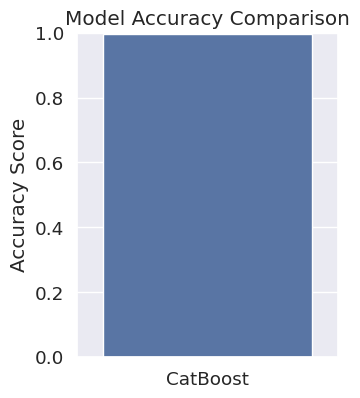

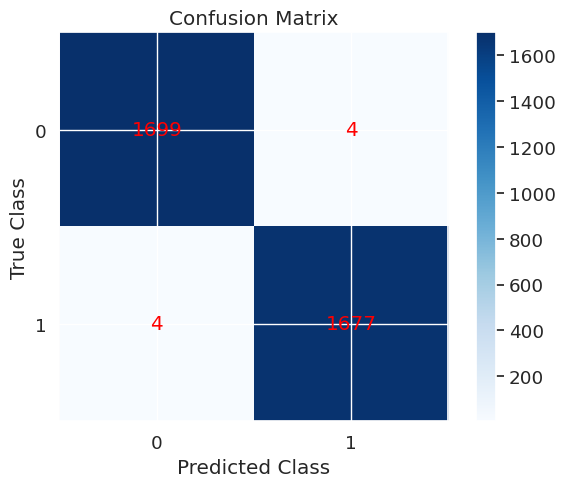

In [ ]:
# Plot accuracy score
plt.figure(figsize=(3,4))
sns.set(font_scale=1.2)
sns.barplot(x=['CatBoost'], y=[acc_cat])
plt.ylabel('Accuracy Score')
plt.ylim(0,1)
plt.title('Model Accuracy Comparison')
plt.show()

# plot confusion matrix
plt.imshow(conf, cmap='Blues')
plt.title('Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.xticks([0, 1])
plt.yticks([0, 1])
for i in range(2):
    for j in range(2):
        plt.text(j, i, conf[i, j], ha='center', va='center', color='Red')
plt.show()

In [ ]:
# Melihat atribut pada model
feature_names = cat.feature_names_
print("Atribut pada model CatBoost:")
print(feature_names)

Atribut pada model CatBoost:
['Variation', 'Province', 'Regency and City', 'Payment Method', 'Product Category', 'month', 'SKU Platform Discount', 'Shipping Fee After Discount', 'Order Refund Amount']


###Menyimpan Model

In [ ]:
import pickle
# Simpan model ke Google Drive
model_path = '/content/drive/MyDrive/my work in collage/Skripsi/pembatalan_model.sav'
with open(model_path, 'wb') as f:
    pickle.dump(cat, f)